In [104]:
import load_kaggle
import pandas as pd
import numpy as np
import statsmodels.api as sm
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [22]:
data_dict = load_kaggle.get_kaggle_data('noaa/hurricane-database')

100%|██████████| 901k/901k [00:00<00:00, 8.62MB/s]


'tmp_data' folder removed


In [23]:
pacific = data_dict.get('pacific.csv')
atlantic = data_dict.get('atlantic.csv')

##### Status: <br>
- TD $\rightarrow $ Tropical cyclone of tropical depression intensity (< 34 knots) <br>
- TS $\rightarrow $ Tropical cyclone of tropical storm intensity (34-63 knots) <br>
- HU $\rightarrow $ Tropical cyclone of hurricane intensity (> 64 knots) <br>
- EX $\rightarrow $ Extratropical cyclone (of any intensity)  <br>
- SD $\rightarrow $ Subtropical cyclone of subtropical depression intensity (< 34 knots) <br>
- SS $\rightarrow $ Subtropical cyclone of subtropical storm intensity (> 34 knots) <br> 
- LO $\rightarrow $ A low that is neither a tropical cyclone, a subtropical cyclone, nor an extratropical cyclone <br>
- WV $\rightarrow $ Tropical Wave (of any intensity) <br>
- DB $\rightarrow $ Disturbance (of any intensity)<br>
<br>

##### Event: <br>
C $\rightarrow$ Closest approach to a coast, not followed by a landfall
G $\rightarrow$ Genesis <br>
I $\rightarrow$ An intensity peak in terms of both pressure and wind <br>
L $\rightarrow$ Landfall (center of system crossing a coastline) <br>
P $\rightarrow$ Minimum in central pressure <br>
R $\rightarrow$ Provides additional detail on the intensity of the cyclone when rapid changes are underway <br>
S $\rightarrow$ Change of status of the systemT – Provides additional detail on the track (position) of the cyclone <br>

In [24]:
# remove leading whitespace
atlantic.Event = atlantic.Event.str.strip()
pacific.Event = pacific.Event.str.strip()
atlantic.Status = atlantic.Status.str.strip()
pacific.Status = pacific.Status.str.strip()

In [25]:
atlantic.replace(to_replace = "^s\s$", value = np.nan, regex = True, inplace = True)

In [26]:
pacific.replace(to_replace = "^\s\s$", value = np.nan, regex = True, inplace = True)

In [27]:
type_dictionary = {"Event": "category", "Status": "category"}
pacific = pacific.astype(type_dictionary)
atalantic = atlantic.astype(type_dictionary)

In [28]:
df_p = pacific.groupby(['Status']).count().ID.reset_index(name = "Count").sort_values(["Count"]).reset_index(drop = True)
df_a = atlantic.groupby(['Status']).count().ID.reset_index(name = "Count").sort_values(["Count"]).reset_index(drop = True)

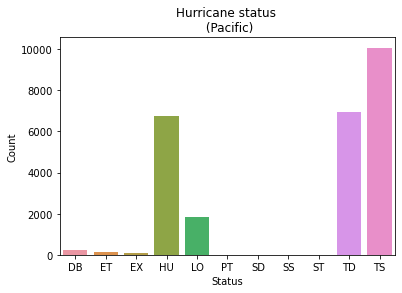

In [29]:
# returns matplotlib axes instance
_ = sns.barplot(x = df_p.Status, y = df_p.Count).set_title("Hurricane status \n (Pacific)")
# WARUM HIER NICHT GEORDNET ??!

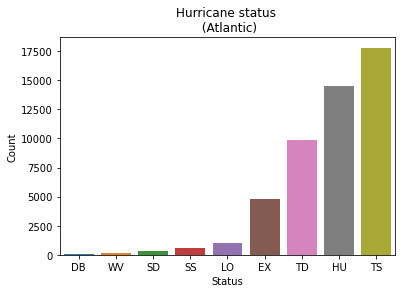

In [30]:
_ = sns.barplot(x = df_a.Status, y = df_a.Count).set_title("Hurricane status \n (Atlantic)")

In [31]:
df_p = pacific.groupby("Event").count().ID.reset_index(name = "Count").sort_values(["Count"]).reset_index(drop = True)
df_a = atlantic.groupby("Event").count().ID.reset_index(name = "Count").sort_values(["Count"]).reset_index(drop = True)

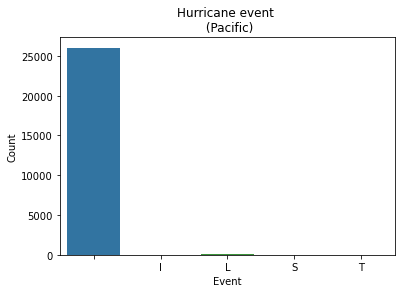

In [32]:
_ = sns.barplot(x = df_p.Event, y = df_p.Count).set_title("Hurricane event \n (Pacific)")

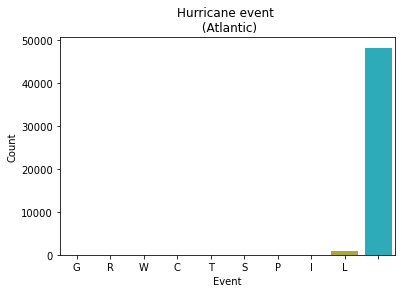

In [33]:
_ = sns.barplot(x = df_a.Event, y = df_a.Count).set_title("Hurricane event \n (Atlantic)")

In [68]:
coordinates_a = pd.concat([pd.to_numeric(atlantic.Latitude.str.strip("NWSE")),
                         pd.to_numeric(atlantic.Longitude.str.strip("NWSE"))], axis = 1)
coordinates_p = pd.concat([pd.to_numeric(pacific.Latitude.str.strip("NWSE")),
                         pd.to_numeric(pacific.Longitude.str.strip("NWSE"))], axis = 1)

In [146]:
outliers_a = coordinates_a[coordinates_a.Longitude > coordinates_a.Longitude.quantile(0.999)]
outliers_p = coordinates_p[coordinates_p.Latitude > coordinates_p.Latitude.quantile(0.999)]

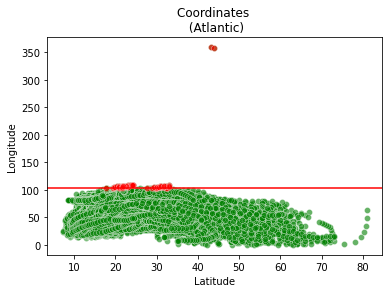

In [173]:
_ = sns.scatterplot(x = coordinates_a.Latitude, y = coordinates_a.Longitude, alpha = 0.6,
                    color = "green")
_.axhline(outliers_a.Longitude.min(), color = "red")
_.annotate("99.9% percentile", xy =(outliers_a.Longitude.min(),outliers_a.Longitude.min()) )
_ = sns.scatterplot(x = outliers_a.Latitude, y = outliers_a.Longitude, alpha = 0.6,
                    color = "red").set_title("Coordinates \n (Atlantic)")

In [144]:
model_a = sm.OLS(coordinates_a.Longitude, coordinates_a.Latitude).fit()
cook_a = model_a.get_influence().cooks_distance

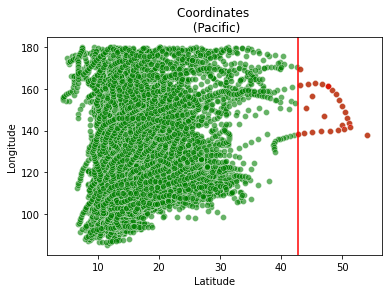

In [168]:
_ = sns.scatterplot(x = coordinates_p.Latitude, y = coordinates_p.Longitude, alpha = 0.6,
                    color = "green")
_.axvline(outliers_p.Latitude.min(), color = "red")
_ = sns.scatterplot(x = outliers_p.Latitude, y = outliers_p.Longitude, alpha = 0.6,
                    color = "red").set_title("Coordinates \n (Pacific)")